# Task 2 : Decision Trees for Human Activity Recognition

#### Importing Libraries

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix

np.random.seed(42)

In [2]:
sys.path.insert(0, os.path.abspath('..'))
from latexify import latexify, format_axes
latexify()

# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Question-1

Q1. Use Sklearn Library to train Decision Tress.
* Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model. 
* Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model. 
* Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model. 
* Compare the results of the three models. Which model do you think is better? 

**Solution:**

### 1.1 Training a decision tree model using the raw accelerometer data

#### Loading raw accelerometer data

In [3]:
# Load the .npy files from the parent directory
X_train = np.load('../Saved_Datasets/Raw_Acc_Data/X_train.npy')
y_train = np.load('../Saved_Datasets/Raw_Acc_Data/y_train.npy')

X_test = np.load('../Saved_Datasets/Raw_Acc_Data/X_test.npy')
y_test  = np.load('../Saved_Datasets/Raw_Acc_Data/y_test.npy')

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (126, 500, 3)
X_test: (54, 500, 3)
y_train: (126,)
y_test: (54,)


#### Reshaping X_train from shape (126,500,3) to (126,1500)

In [4]:
X_train_stacked=np.hstack((X_train[:,:,0],X_train[:,:,1],X_train[:,:,2]))
X_test_stacked=np.hstack((X_test[:,:,0],X_test[:,:,1],X_test[:,:,2]))

print(f"X_train_stacked: {X_train_stacked.shape}")
print(f"x_test: {X_test_stacked.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train_stacked: (126, 1500)
x_test: (54, 1500)
y_train: (126,)
y_test: (54,)


#### Using SkLearn's Decision Tree

In [5]:
dt1=DecisionTreeClassifier(random_state=42)
dt1.fit(X_train_stacked,y_train)

y_pred_raw=dt1.predict(X_test_stacked)

In [6]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred_raw))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred_raw,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_pred_raw,average='macro'))

Accuracy:  0.6111111111111112
Precision:  0.6103535353535353
Recall:  0.611111111111111


#### Plotting confusion matrix

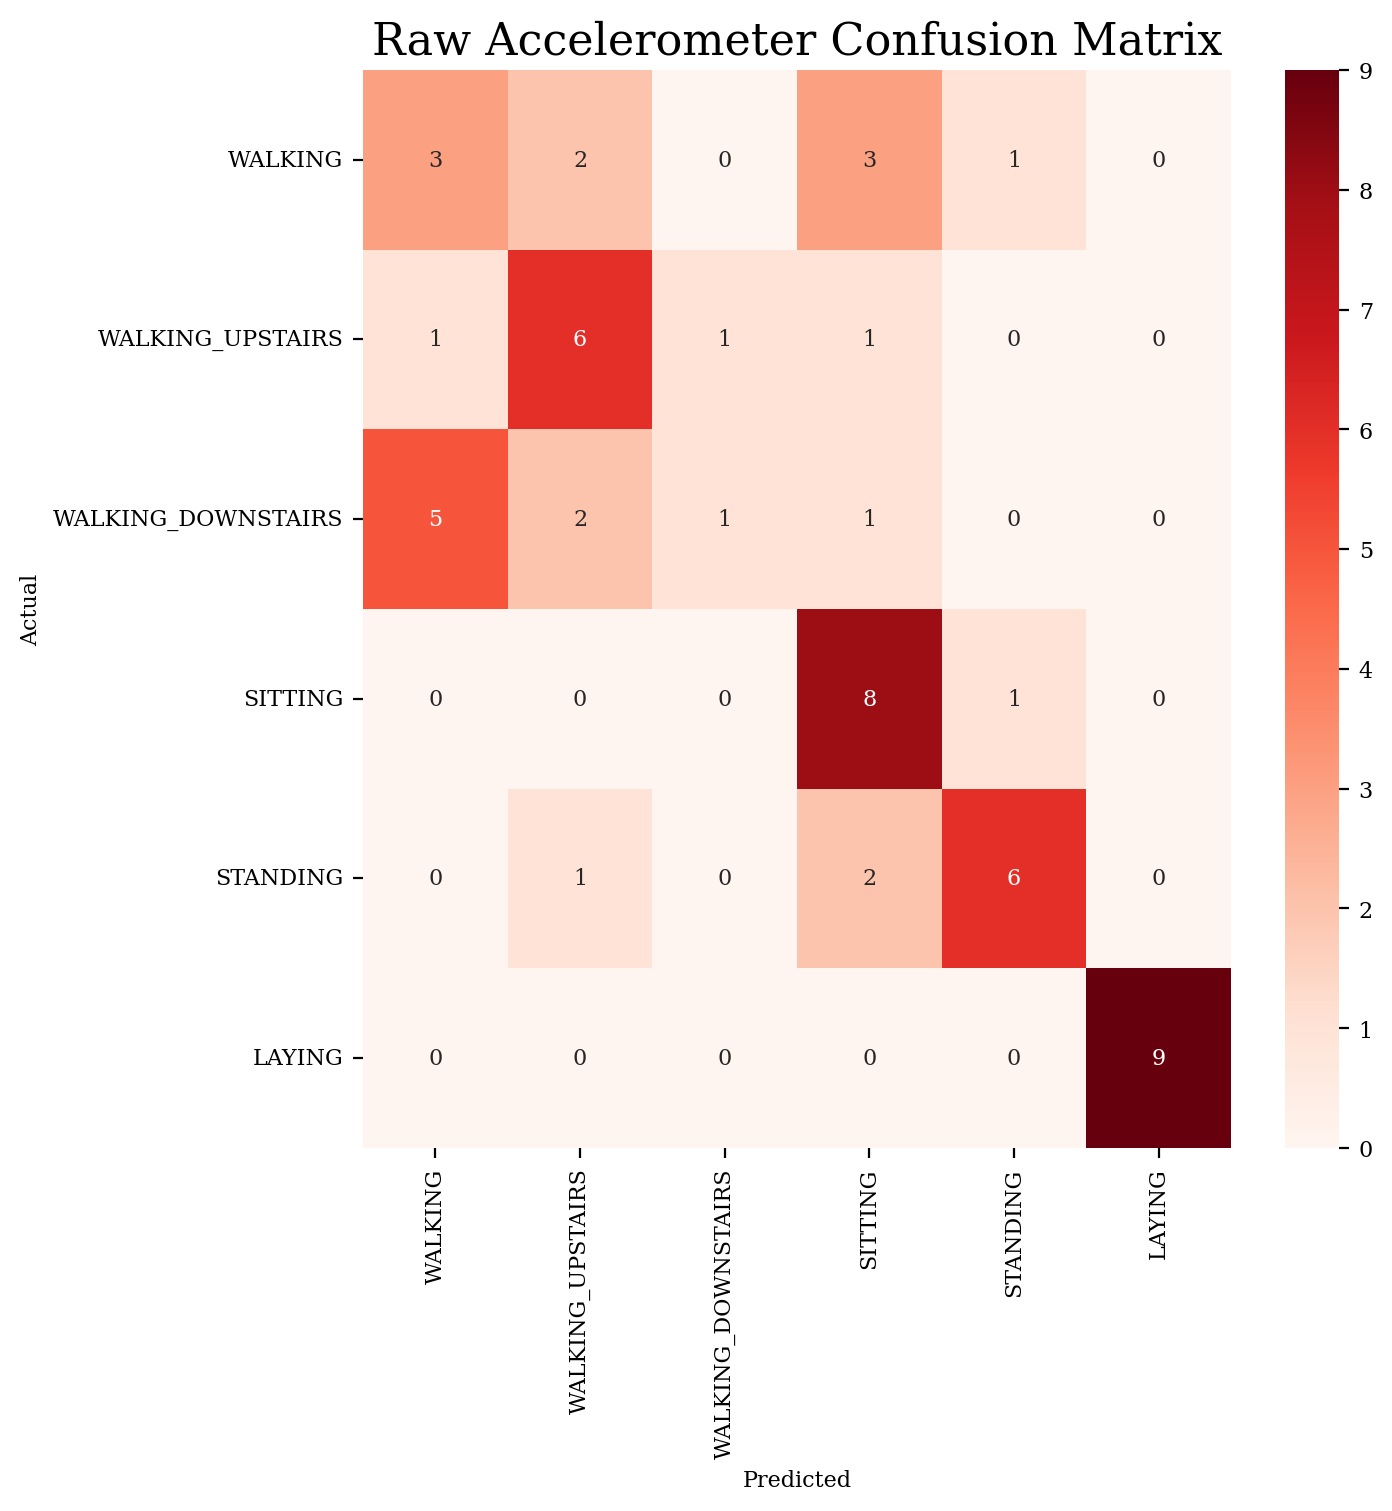

In [7]:
labels = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}

# print(y_pred_raw[y_pred_raw==y_test])
cm = confusion_matrix(y_test, y_pred_raw)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.title('Raw Accelerometer Confusion Matrix', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')

if not os.path.exists('./Saved_Images'):
    os.makedirs('./Saved_Images')
plt.savefig('./Saved_Images/Raw_Acc_Confusion_Matrix.png', bbox_inches='tight', dpi=300)

plt.show()

#### Saving the decision tree model

In [8]:
import pickle

if not os.path.exists('../Task-4 Data Collection in the Wild/Models'):
    os.makedirs('../Task-4 Data Collection in the Wild/Models')
# Save the model to disk
filename = '../Task-4 Data Collection in the Wild/Models/dt1_model.sav'
pickle.dump(dt1, open(filename, 'wb'))

### 1.2 Training a decision tree model using features obtained by TSFEL

#### Loading features provided by TSFEL

In [9]:
import tsfel

# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test, verbose=1,fs =50)

print(f"X_train_tsfel: {X_train_tsfel.shape}")
print(f"X_test_tsfel: {X_test_tsfel.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
X_train_tsfel: (126, 1152)
X_test_tsfel: (54, 1152)
y_train: (126,)
y_test: (54,)


#### Using SkLearn's Decision Tree

In [10]:
dt2=DecisionTreeClassifier(random_state=42)
dt2.fit(X_train_tsfel,y_train)

y_pred_tsfel=dt2.predict(X_test_tsfel)

In [11]:
print("Accuracy: ",sklearn.metrics.accuracy_score(y_test, y_pred_tsfel))
print("Precision: ",sklearn.metrics.precision_score(y_test, y_pred_tsfel,average='macro'))
print("Recall: ",sklearn.metrics.recall_score(y_test, y_pred_tsfel,average='macro'))

Accuracy:  0.8888888888888888
Precision:  0.8936988936988937
Recall:  0.8888888888888888


#### Plotting confusion matrix

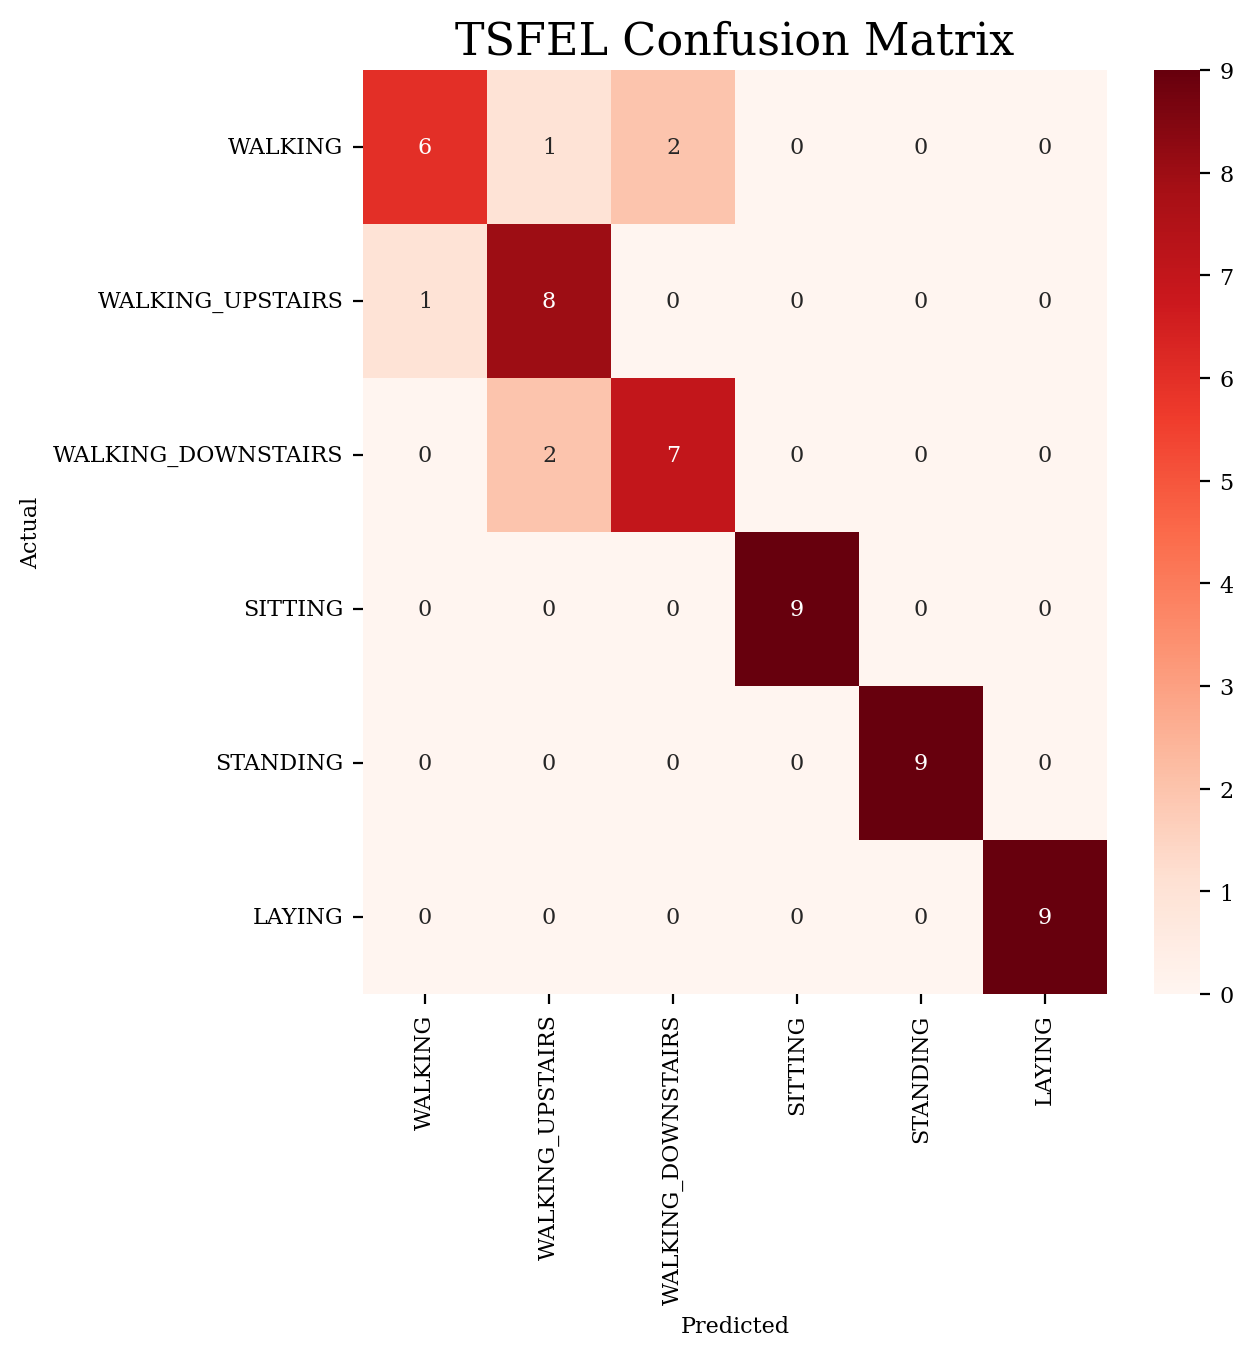

In [12]:
cm = confusion_matrix(y_test, y_pred_tsfel)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.title('TSFEL Confusion Matrix', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')

if not os.path.exists('./Saved_Images'):
    os.makedirs('./Saved_Images')
plt.savefig('./Saved_Images/TSFEL_Confusion_Matrix.png', bbox_inches='tight', dpi=300)

plt.show()

#### Saving the decision tree model

In [13]:
import pickle

if not os.path.exists('../Task-4 Data Collection in the Wild/Models'):
    os.makedirs('../Task-4 Data Collection in the Wild/Models')
# Save the model to disk
filename = '../Task-4 Data Collection in the Wild/Models/dt2_model.sav'
pickle.dump(dt2, open(filename, 'wb'))

### 1.3 Training a decision tree model using the features provided in UCI HAR dataset

#### Loading the UCI HAR dataset

In [14]:
X_train_UCI = np.load('../Saved_Datasets/UCI_561/UCI_X_train.npy')
y_train_UCI = np.load('../Saved_Datasets/UCI_561/UCI_y_train.npy')

X_test_UCI = np.load('../Saved_Datasets/UCI_561/UCI_X_test.npy')
y_test_UCI = np.load('../Saved_Datasets/UCI_561/UCI_y_test.npy')

print(f"X_train: {X_train_UCI.shape}")
print(f"X_test: {X_test_UCI.shape}")
print(f"y_train: {y_train_UCI.shape}")
print(f"y_test: {y_test_UCI.shape}")

X_train: (7352, 561)
X_test: (2947, 561)
y_train: (7352, 1)
y_test: (2947, 1)


#### Using SkLearn's Decision Tree

In [15]:
dt3=DecisionTreeClassifier(random_state=42)
dt3.fit(X_train_UCI,y_train_UCI)

y_pred_UCI=dt3.predict(X_test_UCI)

In [16]:
print("Accuracy: ", sklearn.metrics.accuracy_score(y_test_UCI, y_pred_UCI))
print("Precision: ", sklearn.metrics.precision_score(y_test_UCI, y_pred_UCI,average='macro'))
print("Recall: ", sklearn.metrics.recall_score(y_test_UCI, y_pred_UCI,average='macro'))

Accuracy:  0.8622327790973872
Precision:  0.8624733067496783
Recall:  0.8586831847358827


#### Plotting the confusion matrix

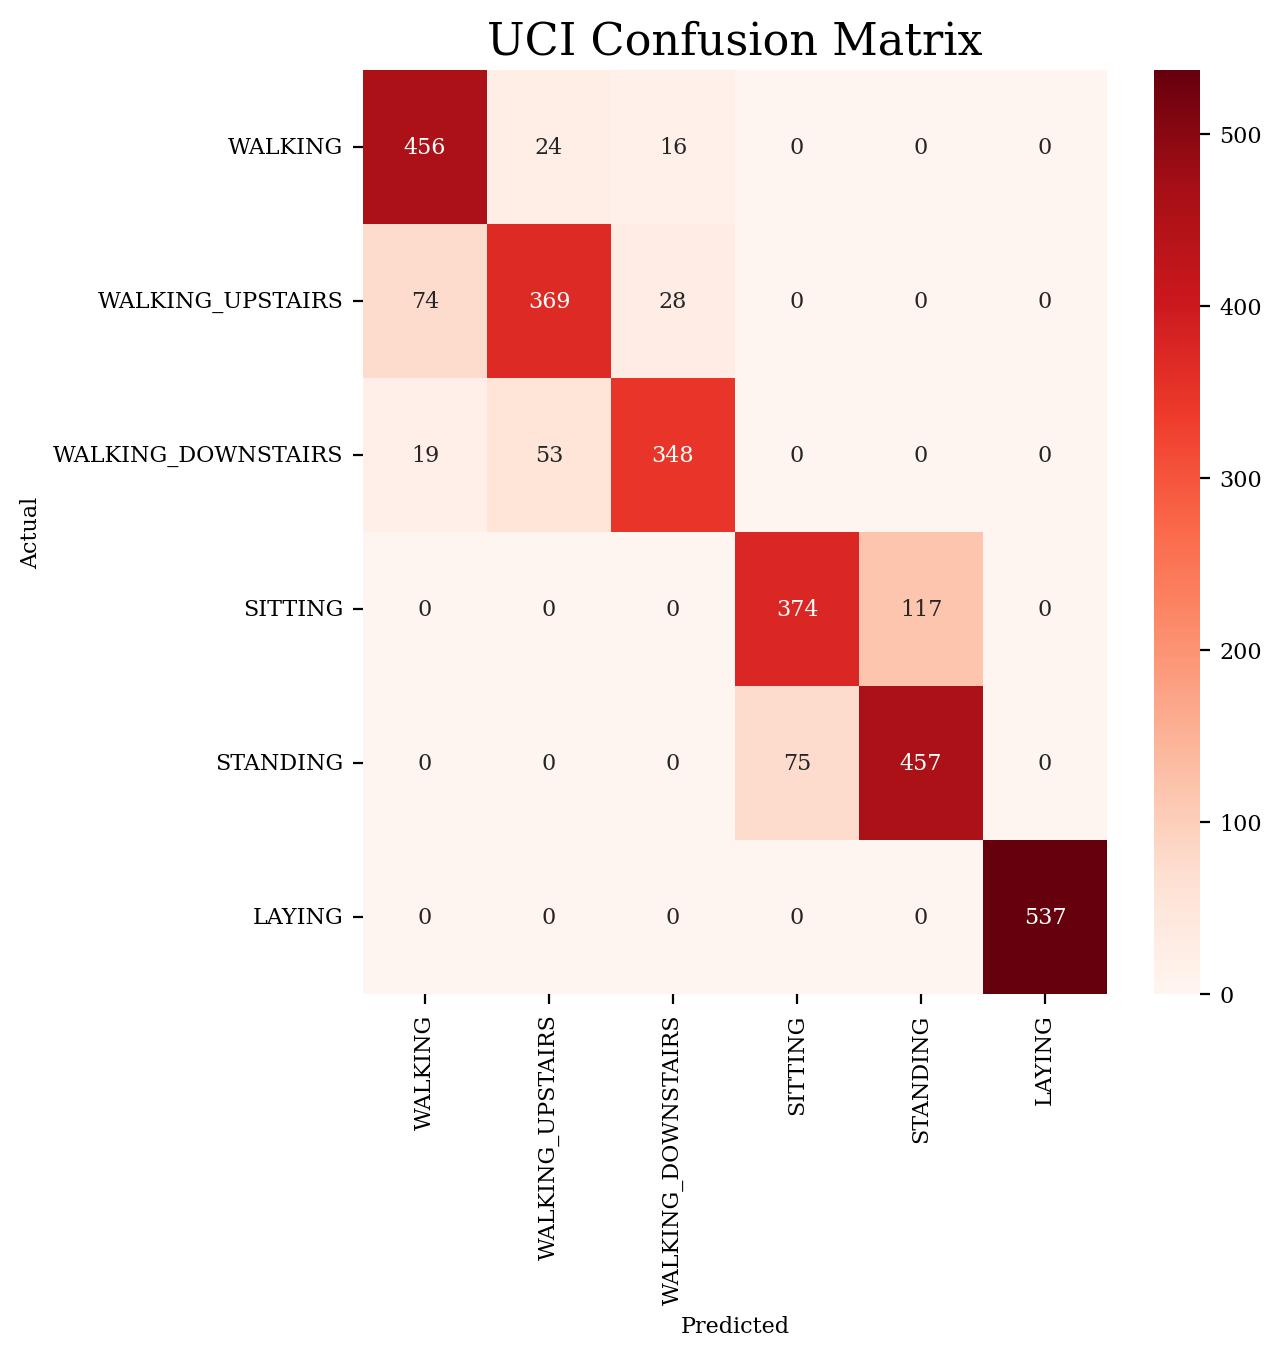

In [17]:
cm = confusion_matrix(y_test_UCI, y_pred_UCI)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.title('UCI Confusion Matrix', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')

if not os.path.exists('./Saved_Images'):
    os.makedirs('./Saved_Images')
plt.savefig('./Saved_Images/UCI_Confusion_Matrix.png', bbox_inches='tight', dpi=300)

plt.show()

#### Saving the decision tree model

In [18]:
import pickle

if not os.path.exists('../Task-4 Data Collection in the Wild/Models'):
    os.makedirs('../Task-4 Data Collection in the Wild/Models')
# Save the model to disk
filename = '../Task-4 Data Collection in the Wild/Models/dt3_model.sav'
pickle.dump(dt3, open(filename, 'wb'))

### 1.4 Comparison of Results

On comparing the results of the 3 models shown above, the model that uses tsfel features performs the best having accuracy of around 88.89%, then comes the model which uses the features provided in UCI-HAR dataset with an accuracy of 86.22% and model that uses raw accelerometer data performs the worst with an accuracy of 61.11%.

This clearly shows that pre-precoessing of the data helps significantly in improving the performance of the model.

## Question 2

Q2. Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree.

**Solution:**

### Training Decision Trees with varying depths (2-8)

In [19]:
def dt_varying_depths(X_train, y_train, X_test, y_test, depth_list):
    y_pred=[]
    accuracies=[]
    for i in depth_list:
        dt=DecisionTreeClassifier(max_depth=i,random_state=0)
        dt.fit(X_train,y_train)
        yp=dt.predict(X_test)
        accuracy = sklearn.metrics.accuracy_score(y_test, yp)
        print(f"    Accuracy for depth {i}: ", np.round(accuracy, 4))
        y_pred.append(yp)
        accuracies.append(accuracy)
    return y_pred, accuracies


In [20]:
depth_list = range(2, 9)
print("\nRaw Data")
y_pred_raw_vary_depth, accuracy_raw = dt_varying_depths(X_train_stacked, y_train, X_test_stacked, y_test, depth_list)
print("\nTSFEL Features")
y_pred_tsfel_vary_depth, accuracy_tsfel = dt_varying_depths(X_train_tsfel, y_train, X_test_tsfel, y_test, depth_list)
print("\nUCI HAR Dataset")
y_pred_UCI_vary_depth, accuracy_UCI = dt_varying_depths(X_train_UCI, y_train_UCI, X_test_UCI, y_test_UCI, depth_list)


Raw Data
    Accuracy for depth 2:  0.4259
    Accuracy for depth 3:  0.537
    Accuracy for depth 4:  0.5741
    Accuracy for depth 5:  0.5926
    Accuracy for depth 6:  0.6296
    Accuracy for depth 7:  0.6296
    Accuracy for depth 8:  0.6481

TSFEL Features
    Accuracy for depth 2:  0.5
    Accuracy for depth 3:  0.7593
    Accuracy for depth 4:  0.8519
    Accuracy for depth 5:  0.8333
    Accuracy for depth 6:  0.8333
    Accuracy for depth 7:  0.8333
    Accuracy for depth 8:  0.8333

UCI HAR Dataset
    Accuracy for depth 2:  0.531
    Accuracy for depth 3:  0.7224
    Accuracy for depth 4:  0.8096
    Accuracy for depth 5:  0.8385
    Accuracy for depth 6:  0.8551
    Accuracy for depth 7:  0.8639
    Accuracy for depth 8:  0.8707


### Plotting accuracy vs depth graph

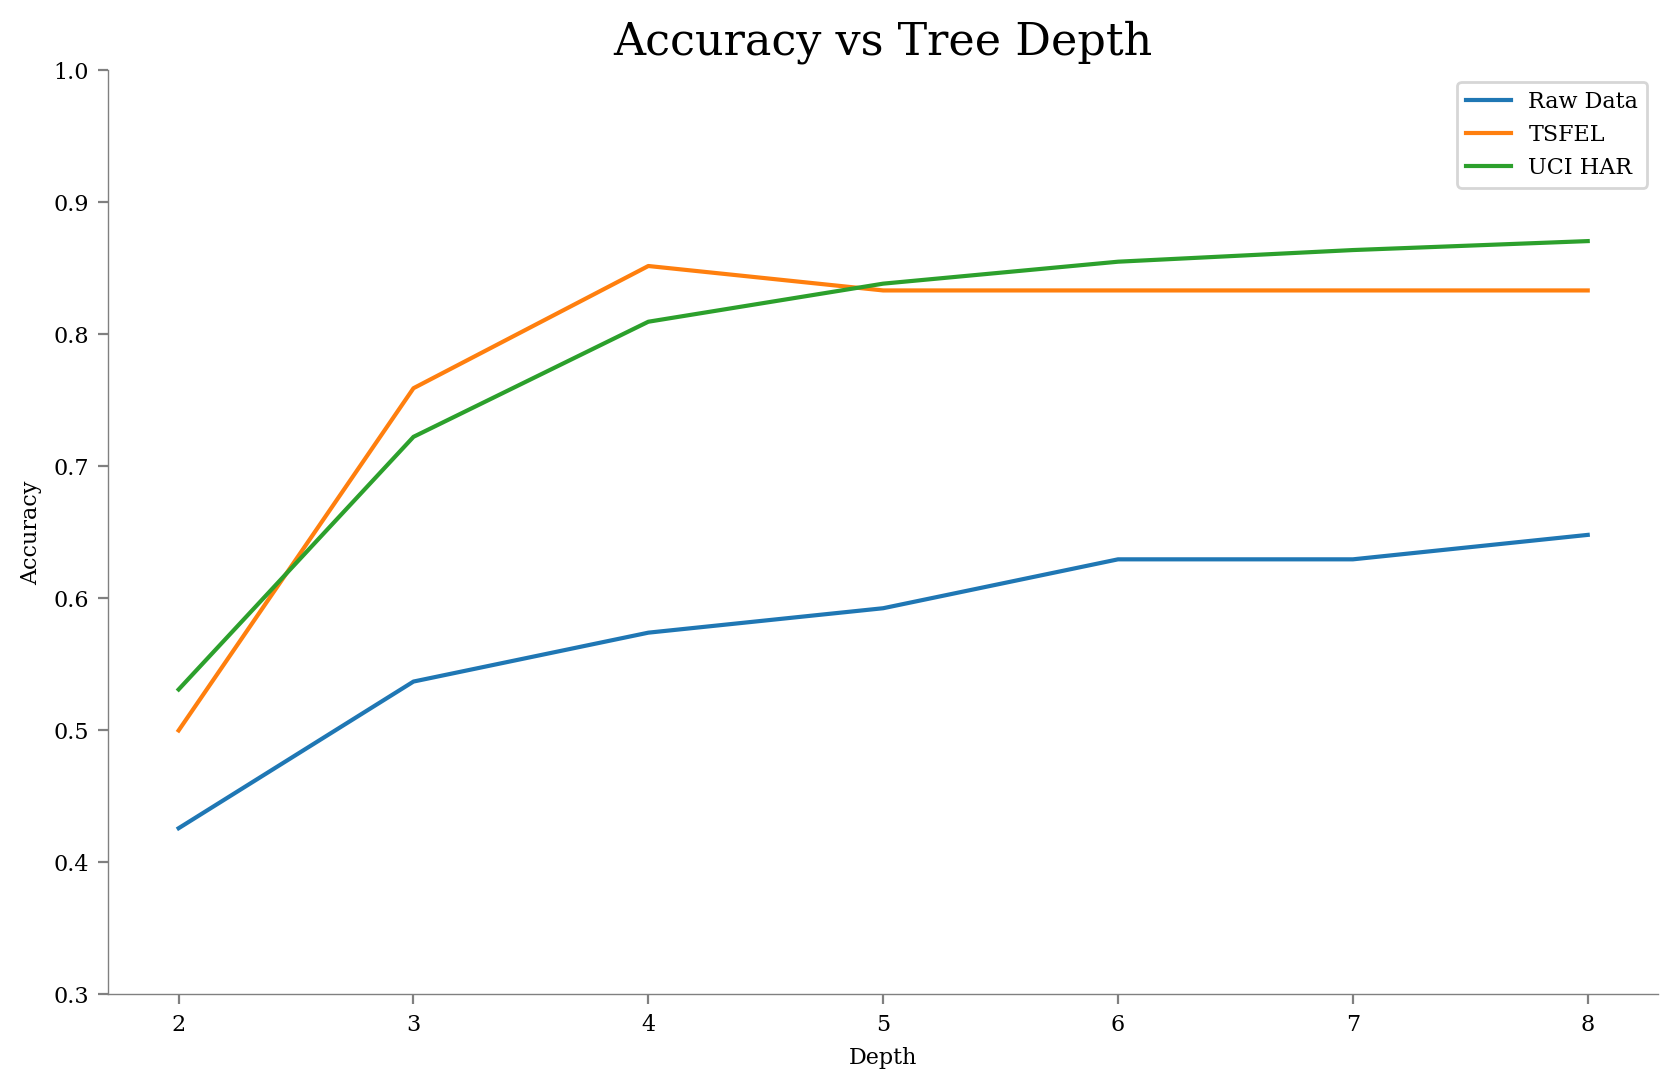

In [21]:
plt.figure(figsize=(10, 6))
format_axes(plt.gca())
plt.plot(depth_list, accuracy_raw, label='Raw Data')
plt.plot(depth_list, accuracy_tsfel, label='TSFEL')
plt.plot(depth_list, accuracy_UCI, label='UCI HAR')
plt.title('Accuracy vs Tree Depth', fontsize=16)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.ylim(0.3,1)
plt.legend()
plt.show()

## Question 3

Q3. Are there any participants/activitivies where the Model performance is bad? If Yes, Why?

**Solution:**

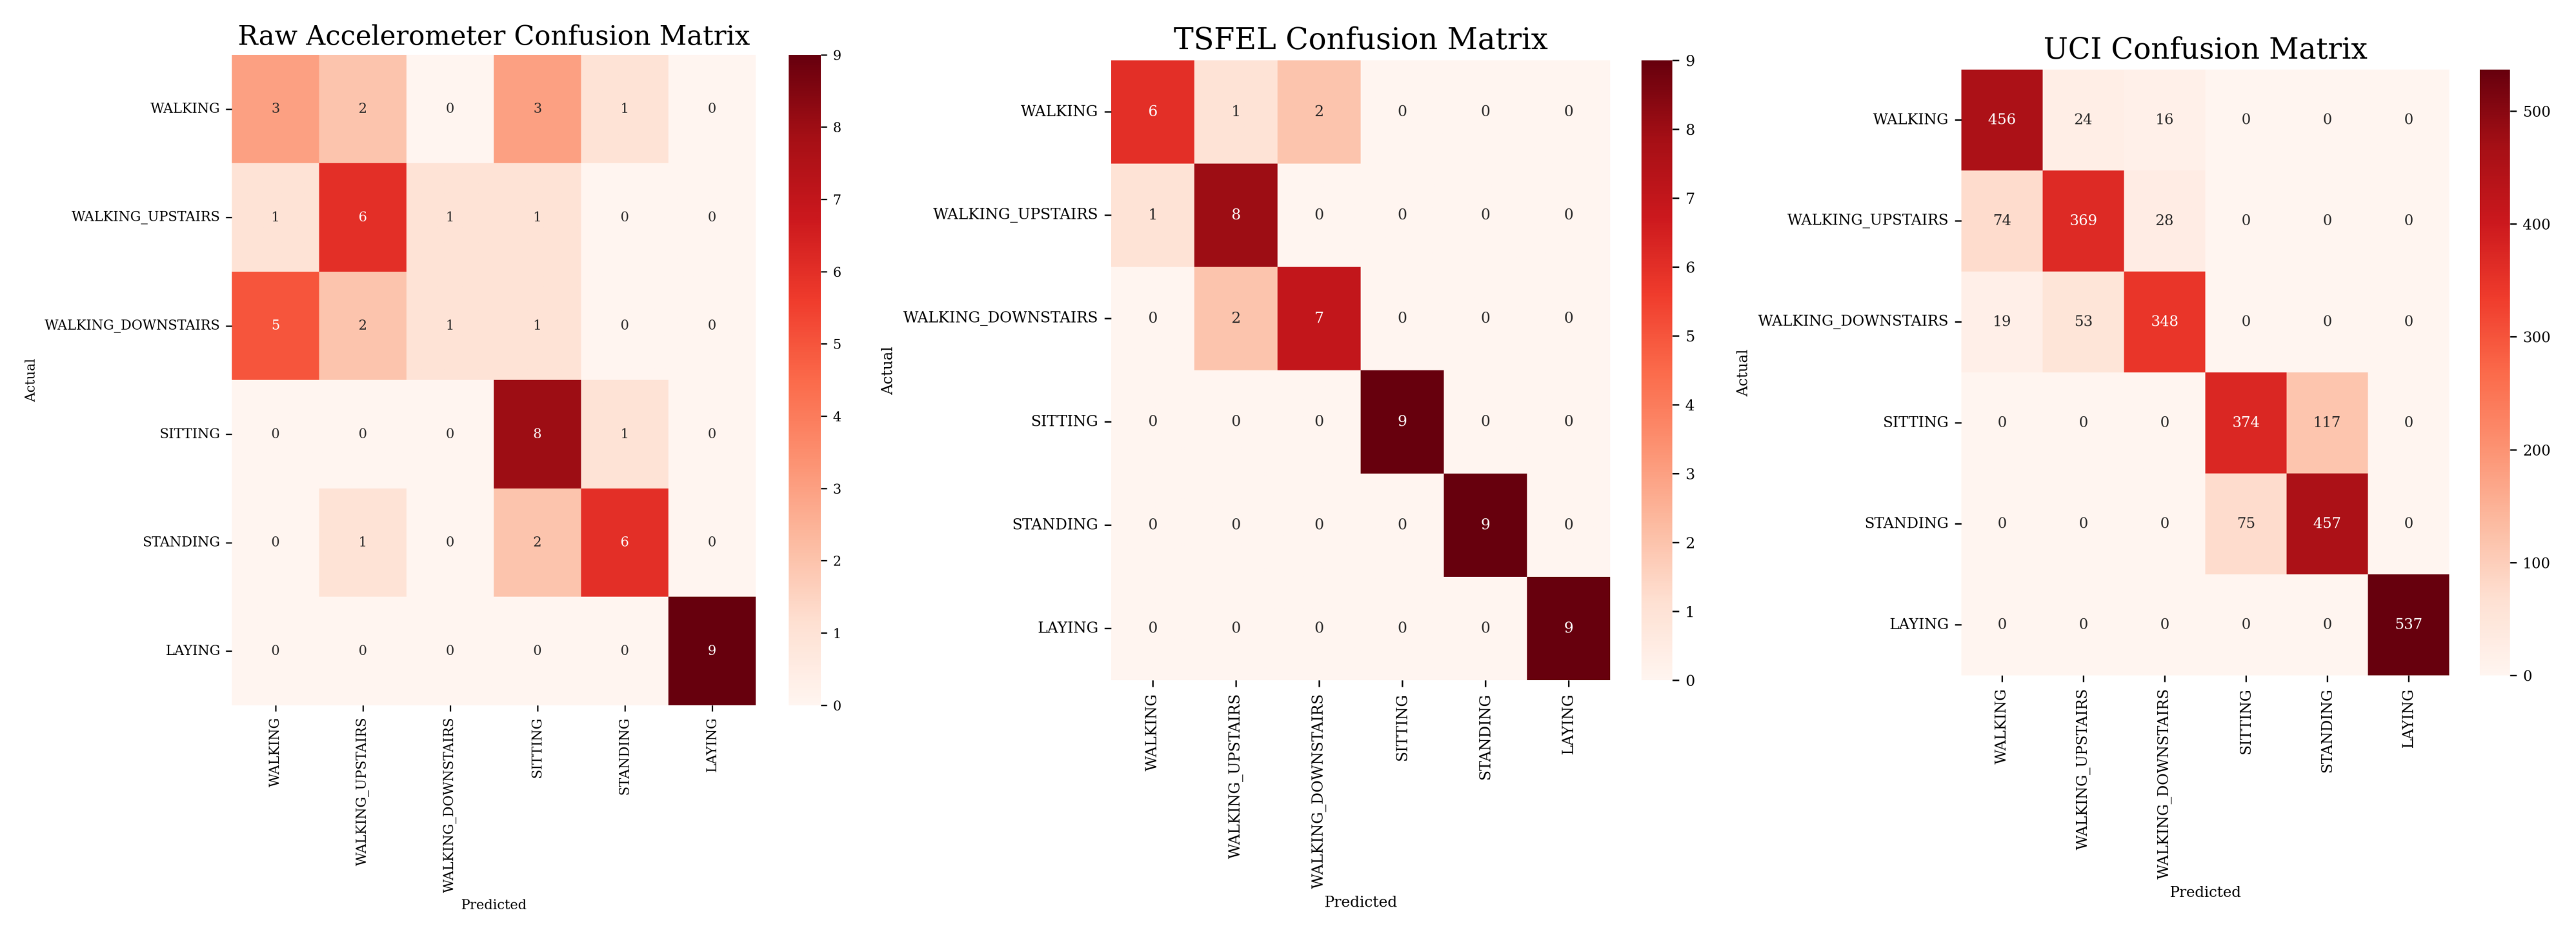

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes = axes.flatten()

plt.subplot(1, 3, 1)
img1 = plt.imread('./Saved_Images/Raw_Acc_Confusion_Matrix.png')
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 3, 2)
img2 = plt.imread('./Saved_Images/TSFEL_Confusion_Matrix.png')
plt.imshow(img2)
plt.axis('off')

plt.subplot(1, 3, 3)
img3 = plt.imread('./Saved_Images/UCI_Confusion_Matrix.png')
plt.imshow(img3)
plt.axis('off')

plt.tight_layout()
plt.show()

1. Model trained using Raw Accelerometer Data:

	The model trained using raw accelerometer data performs poorly compared to the other 2 models. From the confusion matrix, we can observe that it struggles to distinguish between dynamic activities like WALKING, WALKING_UPSTAIRS and WALKING_DOWNSTAIRS. It also faces some confusion between SITTING and STANDING. This is because the raw accelerometer data has only 3 features, which is causing the model to underfit. This can be solved by including more features (for example, by using the TSFEL featurization).


2. Model trained using TSFEL Features:

	The model trained using th 1152 features extracted through TSFEL, performs the best among the three, accuracy-wise. It is able to classify all the static activities with 100% accuracy and also classifies dynamic activities with minimal confusion. This is because the TSFEL features, which are derived through automated processes, provide a set of distinctive features that enable accurate differentiation between various activities.


3. Model trained on UCI Dataset:

	The model trained using the 561 features provided by the UCI HAR dataset, performs almost as good as the TSFEL model. It faces confusion while classifying the dynamic activities similar to the TSFEL model, but it also faces some confusion while classifying between SITTING and STANDING activties. But its performance is sitll impressive as it is able to perform as good as the TSFEL model with just 3-4% accuracy drop and whilst using half the features compared to TSFEL.